In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

In [29]:
X_train, X_test, y_train, y_test1 = train_test_split(X, y,train_size=0.7, test_size=0.3)

In [30]:
image_vector_size = 28*28
x_train = X_train.reshape(X_train.shape[0], image_vector_size)
x_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [31]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test1, num_classes)

In [7]:
from keras.layers import Dense 
from keras.models import Sequential

In [8]:
image_size = 784 # 28*28
num_classes = 10

model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

2022-06-23 16:32:48.130591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.3)

Epoch 1/50
268/268 [==============================] - 1s 2ms/step - loss: 0.1989 - accuracy: 0.9422 - auc_2: 0.9964 - val_loss: 0.2089 - val_accuracy: 0.9377 - val_auc_2: 0.9960
Epoch 2/50
268/268 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9404 - auc_2: 0.9965 - val_loss: 0.2048 - val_accuracy: 0.9411 - val_auc_2: 0.9961
Epoch 3/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9432 - auc_2: 0.9966 - val_loss: 0.2096 - val_accuracy: 0.9393 - val_auc_2: 0.9956
Epoch 4/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9423 - auc_2: 0.9966 - val_loss: 0.2089 - val_accuracy: 0.9382 - val_auc_2: 0.9960
Epoch 5/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9414 - auc_2: 0.9963 - val_loss: 0.2126 - val_accuracy: 0.9368 - val_auc_2: 0.9957
Epoch 6/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9433 - auc_2: 0

### Macro AUC - Fully Connected Keras Model

In [48]:
from scipy.special import softmax
import sklearn
import matplotlib.pyplot as plt

probas = model.predict(X_test)
pred = softmax(probas, axis=1)
macro_auc = sklearn.metrics.roc_auc_score(y_test, pred, average='macro',multi_class='ovr')

print("Macro ROC AUC: ", macro_auc)

657/657 [==============================] - 0s 580us/step
Macro ROC AUC:  0.9969725829125531


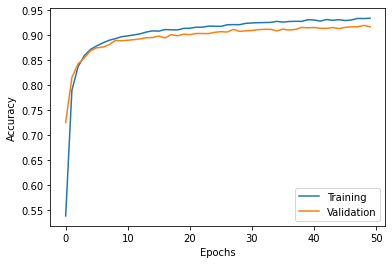

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'],label='Training')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'],label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

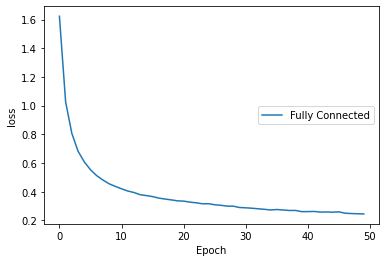

In [23]:
plt.plot(range(len(history.history['loss'])), history.history['loss'],label='Fully Connected')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='right')
plt.show()

Loss comparison calculation of one layer against two layers:

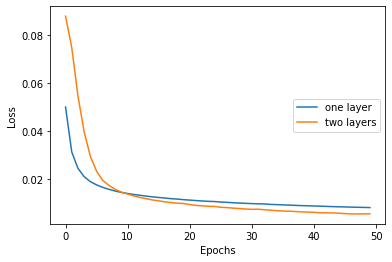

In [16]:
lossOneLayer = [0.04999473959900052, 0.031196336750108456, 0.02433715256002465, 0.020848855324128314, 0.018773130591877383, 0.01742522713455031, 0.016381823099799877, 0.01555384934042015, 0.014848737405469228, 0.014272626636821445, 0.013823717518526459, 0.013399163506053382, 0.013062214043813233, 0.012717735930175968, 0.01240818167459968, 0.012154053009932548, 0.011921268246999886, 0.011646702304500791, 0.011489692895796844, 0.011241748488421905, 0.011050328767137232, 0.010862300612547435, 0.010677482491374193, 0.010536968428190779, 0.01045639660416121, 0.010248614521647504, 0.010112693426449153, 0.009943189632677454, 0.00983553018909133, 0.009690906879458712, 0.0095850018252168, 0.009505767090772724, 0.009454403155648357, 0.009258080397348037, 0.009166600626090256, 0.00904865128515161, 0.008962175923725633, 0.008852527308328364, 0.008744180191992844, 0.008687314717465892, 0.00859005424973732, 0.008520305073257088, 0.008422259715920713, 0.008326385492374704, 0.008251556028851427, 0.008191819349915438, 0.008120509406821746, 0.008043877708468771, 0.008002748442702984, 0.007930044499670256]
lossTwoLayers = [0.08802461417751159, 0.07487629089807515, 0.05462075474446146, 0.03956562212848462, 0.02935561602575201, 0.023123425271423758, 0.019294406151004667, 0.0171653250018384, 0.015544033482374518, 0.014359437566205531, 0.013581860723973532, 0.012809105426399387, 0.012151807432833088, 0.011641047008510862, 0.01111248032436278, 0.010722884650798667, 0.010350569426815125, 0.010014383797848666, 0.009785172563306157, 0.009633280841725265, 0.00919012797101148, 0.00883500753917953, 0.008654012269735757, 0.008466847268629842, 0.008394973242567655, 0.008042632516486946, 0.007925384957070288, 0.0076942205117060914, 0.00751648103948058, 0.007324575150213594, 0.007196096648428556, 0.007252871628645599, 0.007008973702603235, 0.0068641971468482235, 0.006610163416178001, 0.0064842434554990384, 0.006389428088243232, 0.00628597289714853, 0.006123290167167435, 0.0060552698687628605, 0.005938585112471254, 0.005759796722348616, 0.005737676750240289, 0.0056893809951225945, 0.005578684023933235, 0.005402319025787565, 0.005273180610555683, 0.005271657239252066, 0.005279394526116291, 0.005304889733441579]

plt.plot(range(len(lossOneLayer)), lossOneLayer,label='one layer')
plt.plot(range(len(lossTwoLayers)), lossTwoLayers,label='two layers')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='right')
plt.show()